In [150]:
import numpy as np
from numpy import asarray
from PIL import Image, ImageDraw
from skimage.io import imread
import matplotlib.pyplot as plt
from math import *
import time

def Calculatemedian(list):
    a = len(list)
    if a % 2 == 0:
        b = list[len(list)/2]
        c = list[(len(list)/2)-1]
        d = (b + c) / 2
        return d

    if a % 2 > 0:
        return (list[len(list)//2])

def createMedianFilter():
    array = [[1, 3, 1], [3, 5, 3], [1, 3, 1]]
    return array

def createAverageFilter():
    array = [[1, 1, 1], [1, 1, 1] ,[1 , 1, 1]]
    return array

def create_and_sort_V(image,medianFilter): 
    V = []
    for i in range(0, 3):
        for j in range(0, 3):
            counter = medianFilter[i][j]
            while(counter>0):
                V.append(image[i][j])
                counter=counter-1
    V.sort()
    return V
def calculateMedianAndApply(img,vector,filter):
    image = np.array(img, dtype= 'float64')
    limitrow = (image.shape[0]-3)+1
    limitcolumn = (image.shape[1]-3)+1
    for i in range(0, limitrow):
        for j in range(0, limitcolumn):
                image3x3 = [[image[i-1,j-1],image[i-1,j],image[i-1,j+1]],
                            [image[i,j-1],image[i,j],image[i,j+1]] ,
                            [image[i+1,j-1],image[i+1,j],image[i+1,j+1]]]
                
                vector = create_and_sort_V(image3x3,filter)
                median = Calculatemedian(vector)
                image[i][j] = median
    return image    

In [151]:
medianFilter = createMedianFilter()
print(medianFilter)

[[1, 3, 1], [3, 5, 3], [1, 3, 1]]


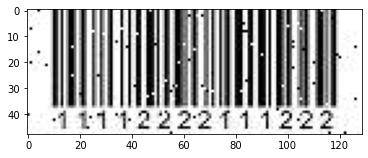

In [152]:
image = Image.open('D:/GUC/Semester 9/DMET 901 Computer Vision/Assignment 3/BarCode2.jpg')
grey_scale_image = image.convert("L")
plt.imshow(grey_scale_image, cmap='gray')

[229.0, 229.0, 229.0, 237.0, 237.0, 237.0, 247.0, 247.0, 247.0, 250.0, 250.0, 250.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255.0]


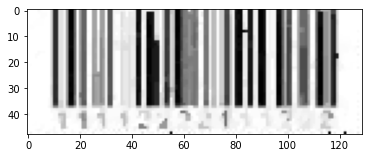

In [153]:
image = np.array(grey_scale_image, dtype= 'float64')
V = create_and_sort_V(image,medianFilter)
print(V)
imageOutput = calculateMedianAndApply(image,V, medianFilter)
plt.imshow(imageOutput, cmap='gray')

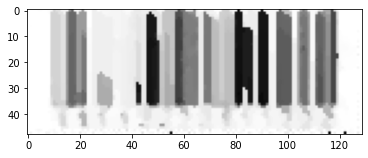

In [154]:
image = np.array(grey_scale_image, dtype= 'float64')
V = create_and_sort_V(image,Averagefilter)
imageOutput = calculateMedianAndApply(grey_scale_image,V,Averagefilter)
plt.imshow(imageOutput, cmap='gray')